In [1]:
!git clone https://github.com/JoshSahni/CNN-Classifier.git
#cd Custom

Cloning into 'CNN-Classifier'...
remote: Enumerating objects: 2741, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 2741 (delta 47), reused 0 (delta 0), pack-reused 2693 (from 1)
Receiving objects: 100% (2741/2741), 359.51 MiB | 44.57 MiB/s, done.
Resolving deltas: 100% (90/90), done.
Updating files: 100% (1773/1773), done.


In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
training_path = "/content/CNN-Classifier/Pnemonia dataset/train"

data_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      validation_split=0.2,
      fill_mode='nearest')

training_generator = data_generator.flow_from_directory(training_path,
                                                    class_mode="binary",
                                                    subset="training",)
validation_generator = data_generator.flow_from_directory(training_path,
                                                    class_mode="binary",
                                                    subset="validation",)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

Found 1168 images belonging to 2 classes.
Found 291 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    training_generator,
    epochs=60,
    validation_data=validation_generator,)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 47s 882ms/step - accuracy: 0.7985 - loss: 2.3801 - val_accuracy: 0.8385 - val_loss: 2.0165
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 636ms/step - accuracy: 0.8744 - loss: 1.3688 - val_accuracy: 0.8385 - val_loss: 3.9457
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 653ms/step - accuracy: 0.8821 - loss: 1.2445 - val_accuracy: 0.8385 - val_loss: 5.4965
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 641ms/step - accuracy: 0.8994 - loss: 1.2268 - val_accuracy: 0.8385 - val_loss: 7.1622
Epoch 5/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 638ms/step - accuracy: 0.9096 - loss: 1.1039 - val_accuracy: 0.8385 - val_loss: 8.2612
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 643ms/step - accuracy: 0.9050 - loss: 1.1331 - val_accuracy: 0.8385 - val_loss: 8.6250
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 644ms/step - accuracy: 0.9033 - loss: 1.1061 - val_accuracy: 0.8385 - val_loss: 8.8940
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 641ms/step - accuracy: 0.9019 - loss: 1.1109 - val_accuracy: 0.838

In [6]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

avg_training_accuracy = sum(training_accuracy) / len(training_accuracy)
avg_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
difference = avg_training_accuracy - avg_validation_accuracy

avg_training_loss = sum(training_loss) / len(training_loss)
avg_validation_loss = sum(validation_loss) / len(validation_loss)

print(f"Average Training Accuracy: {avg_training_accuracy:.4f}")
print(f"Average Validation Accuracy: {avg_validation_accuracy:.4f}")
print(f"Difference: {difference:.4f}")

print(f"Average Training loss: {avg_training_loss:.4f}")
print(f"Average Validation loss: {avg_validation_loss:.4f}")

Average Training Accuracy: 0.9345
Average Validation Accuracy: 0.8794
Difference: 0.0551
Average Training loss: 0.7610
Average Validation loss: 2.1842


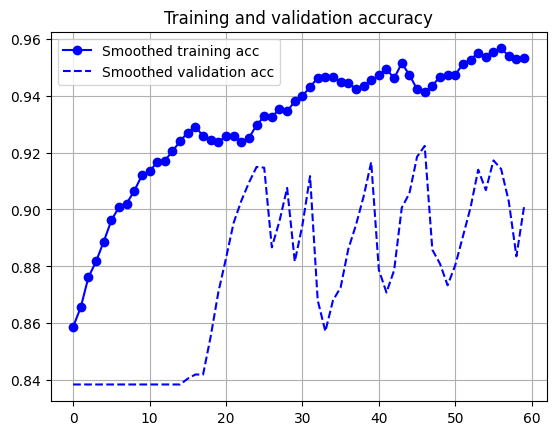

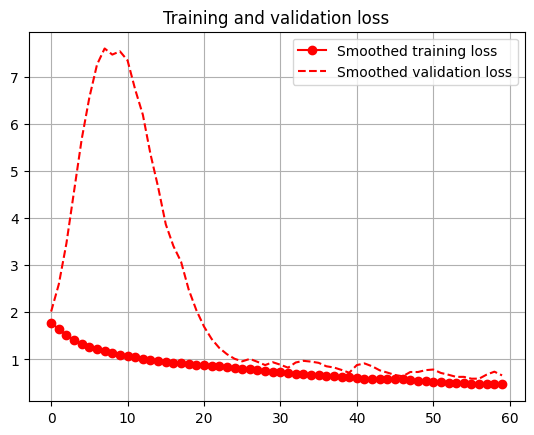

In [7]:
def smooth_curve(points, factor=0.7):
    smooth_points = []
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point * (1 - factor))
        else:
            smooth_points.append(point)
    return smooth_points

acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,
         smooth_curve(acc), 'bo-', markersize=6, label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(validation_acc), 'b--', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid(True)

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'ro-', markersize=6, label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(validation_loss), 'r--', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid(True)

plt.show()

In [8]:
testing_path = "/content/CNN-Classifier/Pnemonia dataset/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        testing_path,
        target_size=(256, 256),
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)

Found 310 images belonging to 2 classes.
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - accuracy: 0.8970 - loss: 0.6463
test acc: 0.8870967626571655


Found 310 images belonging to 2 classes.
  8/310 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


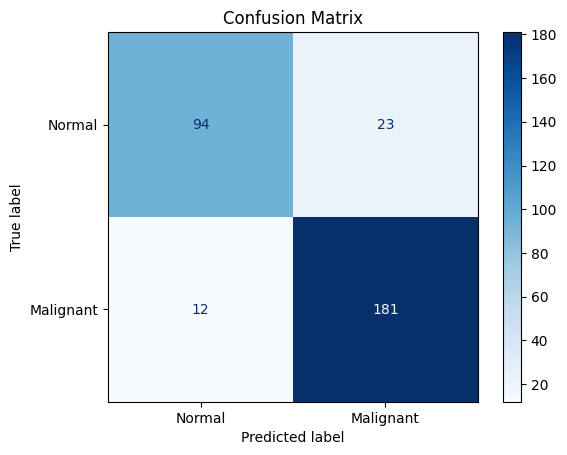

True Negatives (TN): 94 (30.32%)
False Positives (FP): 23 (7.42%)
False Negatives (FN): 12 (3.87%)
True Positives (TP): 181 (58.39%)


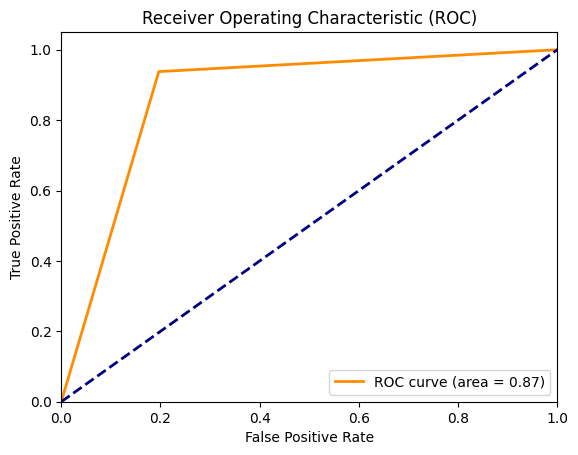

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=testing_path,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

predictions = np.round(model.predict(test_generator)).astype(int).flatten()

true_classes = np.array(test_generator.classes)

cm = confusion_matrix(y_true=true_classes, y_pred=predictions)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Malignant']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

tn, fp, fn, tp = cm.ravel()
total = tn + fp + fn + tp

tn_percent = (tn / total) * 100
fp_percent = (fp / total) * 100
fn_percent = (fn / total) * 100
tp_percent = (tp / total) * 100

print(f"True Negatives (TN): {tn} ({tn_percent:.2f}%)")
print(f"False Positives (FP): {fp} ({fp_percent:.2f}%)")
print(f"False Negatives (FN): {fn} ({fn_percent:.2f}%)")
print(f"True Positives (TP): {tp} ({tp_percent:.2f}%)")

fpr, tpr, _ = roc_curve(y_true=true_classes, y_score=predictions)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()